# 

# Intro à Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Classification

### Chargement des données

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

%config InlineBackend.figure_format="retina"  # For high DPI display

In [5]:
from sklearn import datasets

iris = datasets.load_iris()


In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
xs_2d = iris.data[:, :2]
features = iris.feature_names[:2]

if xs_2d.ndim == 1:
    xs_2d = xs_2d[:, np.newaxis]

ys = iris.target

In [8]:
print(features)

['sepal length (cm)', 'sepal width (cm)']


In [9]:
xs_2d.shape

(150, 2)

In [10]:
ys.shape

(150,)

Disposition attendue des descripteurs (*features*) et des valeurs cibles (*labels*):

![](img/05.02-samples-features.png)

### Entrainement des modèles

In [11]:
from sklearn.model_selection import train_test_split

xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs_2d, ys, random_state=1
)

In [12]:
# 1. Choix du modèle (classe)
from sklearn.naive_bayes import GaussianNB

# 2. Instantiaiton : Gaussian Naïve based (modèle simple et sans paramètre)
model = GaussianNB()

# 3. Apprentissage (fit) du model
model.fit(xs_train, ys_train)

# 4. Prédire sur les données de test
ys_pred = model.predict(xs_test)

### Évaluation

Exactitude (Taux de bonne classification, [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision))

https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics

$$\mathrm{ACC} 
= \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P} + \mathrm {N}}
= \frac{\mathrm{TP} + \mathrm{TN}}
    {\mathrm{TP} + \mathrm{TN} + \mathrm {FP} +\mathrm {FN}}$$

In [13]:
from sklearn.metrics import accuracy_score

score = accuracy_score(ys_test, ys_pred)
print(f"{score :.04f}")

0.8158


### Graphiques

In [14]:
HOP = 0.01  # Step size in the mesh

COLORS = ["green", "red", "blue"]

In [15]:
def plot_decision_boundary(xs, model, colors, hop):

    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, hop), np.arange(y_min, y_max, hop)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx, yy, zz, alpha=0.4, cmap=ListedColormap(colors), antialiased=True
    )


def plot_training_points(xs, ys, colors, features):
    for color, i, tgt_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            xs[ys == i, 0],
            xs[ys == i, 1],
            color=color,
            alpha=0.8,
            label=tgt_name,
            edgecolor="black",
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("3-Class classification")
    plt.xlabel(features[0])
    plt.ylabel(features[1])

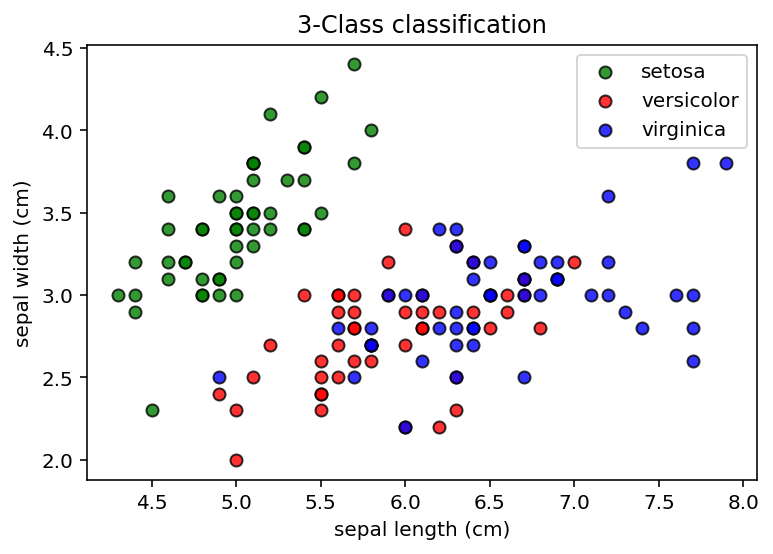

In [16]:
plot_training_points(xs_2d, ys, COLORS, features)

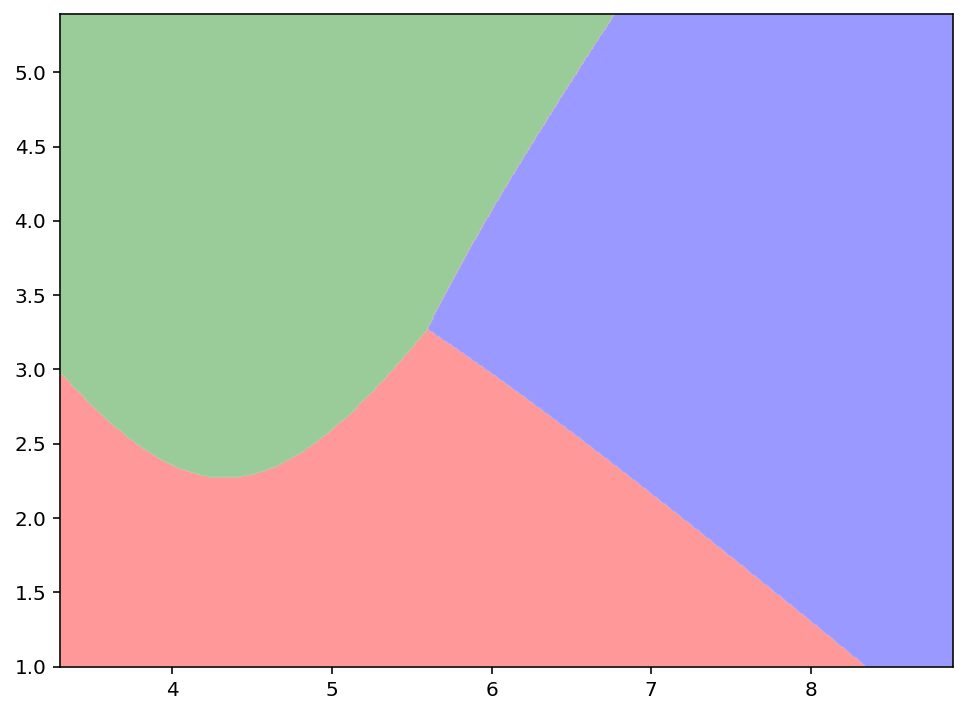

In [17]:
plot_decision_boundary(xs_2d, model, COLORS, HOP)

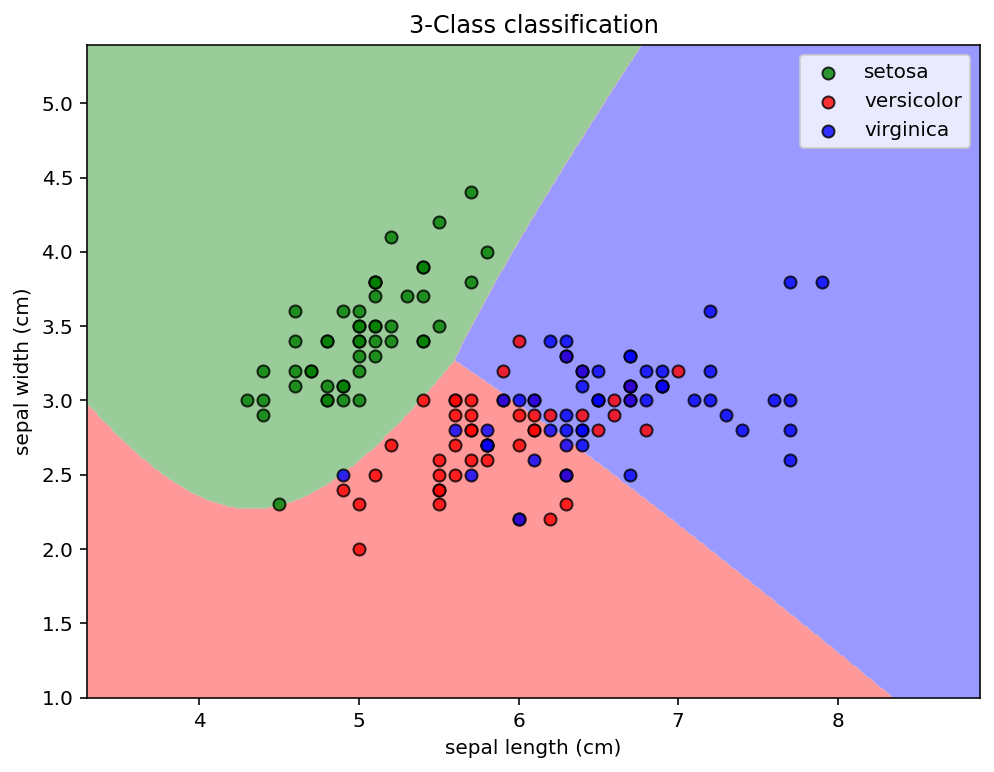

In [18]:
plot_decision_boundary(xs_2d, model, COLORS, HOP)
plot_training_points(xs_2d, ys, COLORS, features)

## Exercice 1

Chercher dans la [documentation](https://scikit-learn.org/stable/supervised_learning.html) comment appliquer à ce dataset les autres modèles cités au cours :

* Régression logistique (*[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)*)
* Arbre de décision (*[Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)*)
* Forêt d'arbres décisionnels (*[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)*)
* k plus proches voisins (*[k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)*)
* Machine à vecteurs de support (*[Support Vector Machines, SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)*)

Indiquez les résultats dans un tableau et graphiquement pour chaque système à l'aide des fonctions `plot_...` [ci-dessus](#Graphiques).

Notez les résultats dans un tableau et donnez une courte analyse en comparant les résultats.

<span style="color:red">Implémentez votre solution ci-dessous</span>

#### imports 

#### define the models 


In [19]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 

LR = LogisticRegression ()
DTC = DecisionTreeClassifier ()
RFC =RandomForestClassifier ()
KNN =KNeighborsClassifier ()
SVC = SVC()

models=[LR,DTC,RFC,KNN,SVC]

In [20]:
ys_preds=[]

In [21]:

def apllyModels(xs_train,ys_train,models,ys_preds):
    i=0
    for model in models :
        print(model)
        models[i]=model.fit(xs_train,ys_train)
        ys_preds.append( model.predict(xs_test))
        i=i+1

def checkAccuracy(ys_preds,ys_test,models,features,xs_2d,scores):
    i=0
    for ys_pred in ys_preds:
        score = accuracy_score(ys_test, ys_pred)
        scores.append(score)
        print(f"{models[i]} -> {score :.04f}")
        plot_training_points(xs_2d, ys, COLORS, features)
        
        plot_decision_boundary(xs_2d, models[i], COLORS, HOP)
        
        plot_decision_boundary(xs_2d, models[i], COLORS, HOP)
        plot_training_points(xs_2d, ys, COLORS, features)
        i+=1

In [22]:
apllyModels(xs_train,ys_train,models,ys_preds)

LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
KNeighborsClassifier()
SVC()


LogisticRegression() -> 0.7895
DecisionTreeClassifier() -> 0.6316
RandomForestClassifier() -> 0.7368
KNeighborsClassifier() -> 0.7895
SVC() -> 0.8158


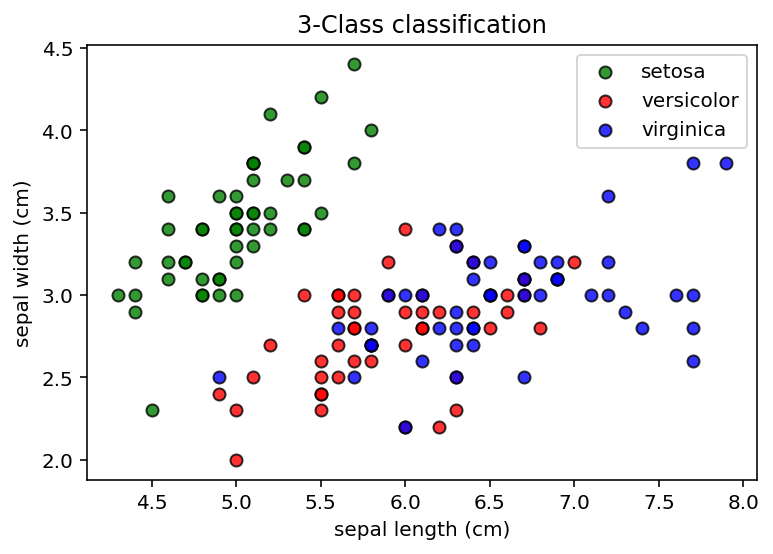

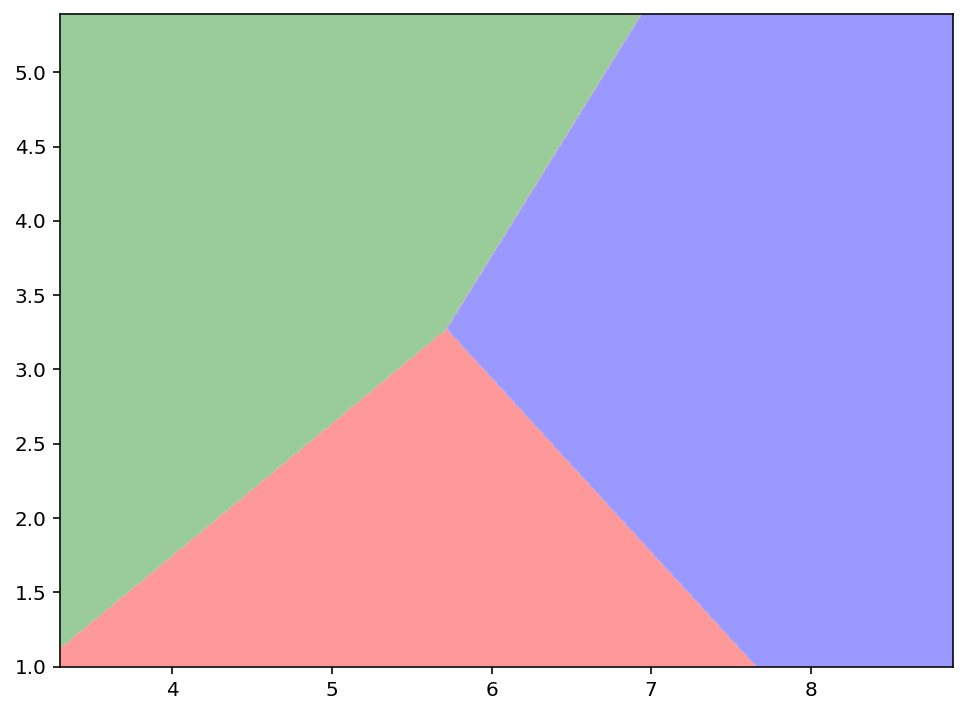

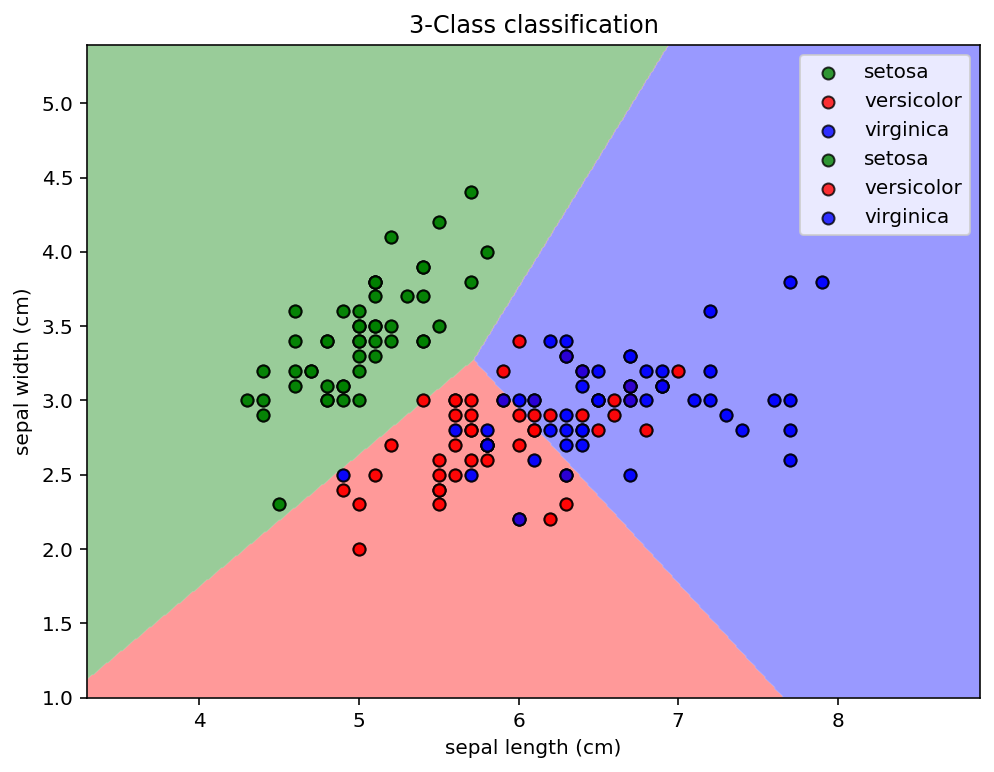

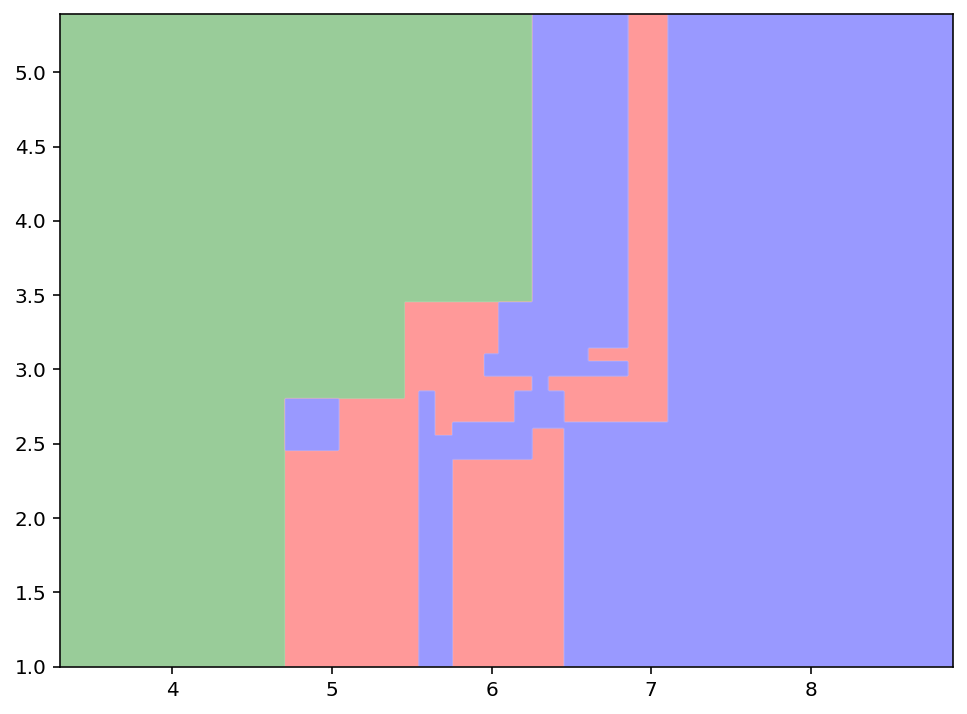

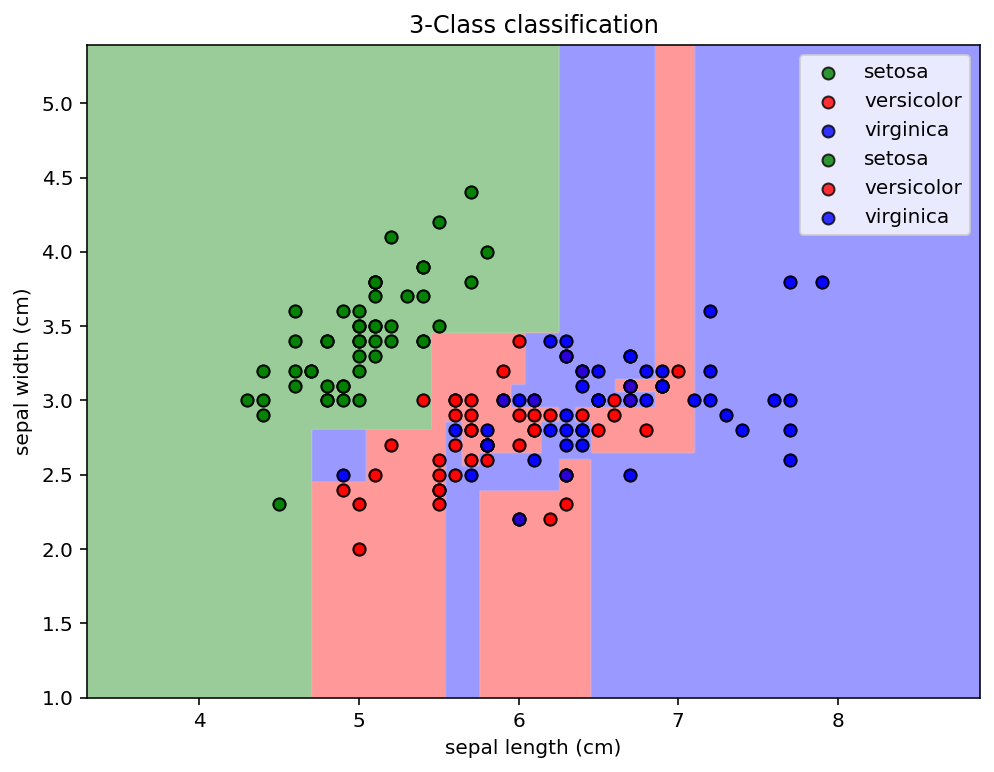

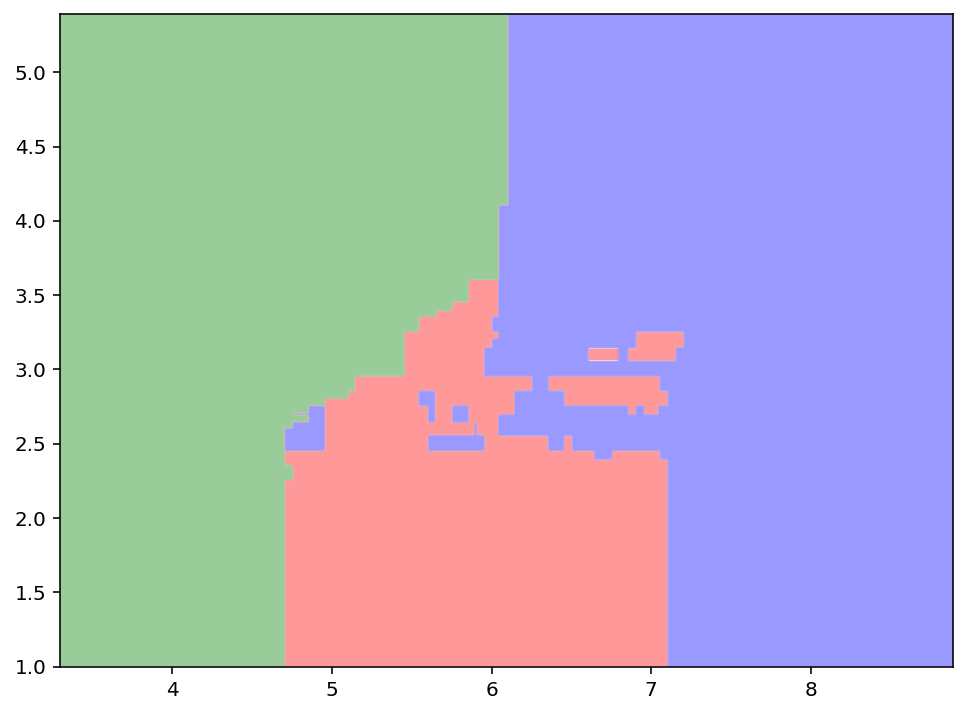

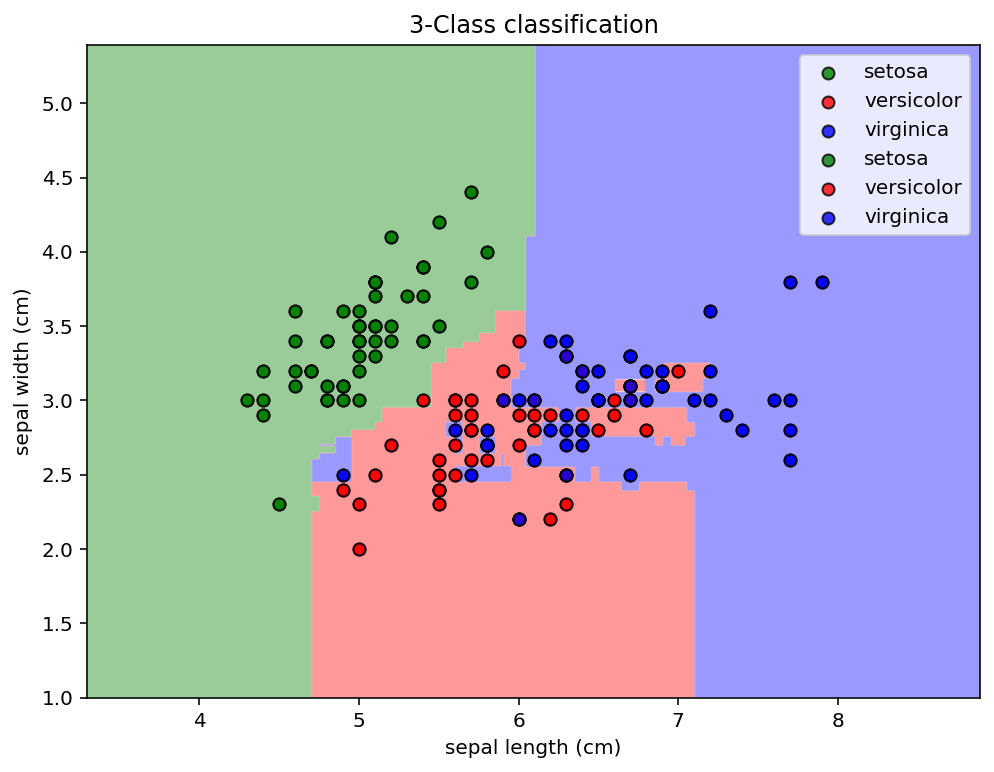

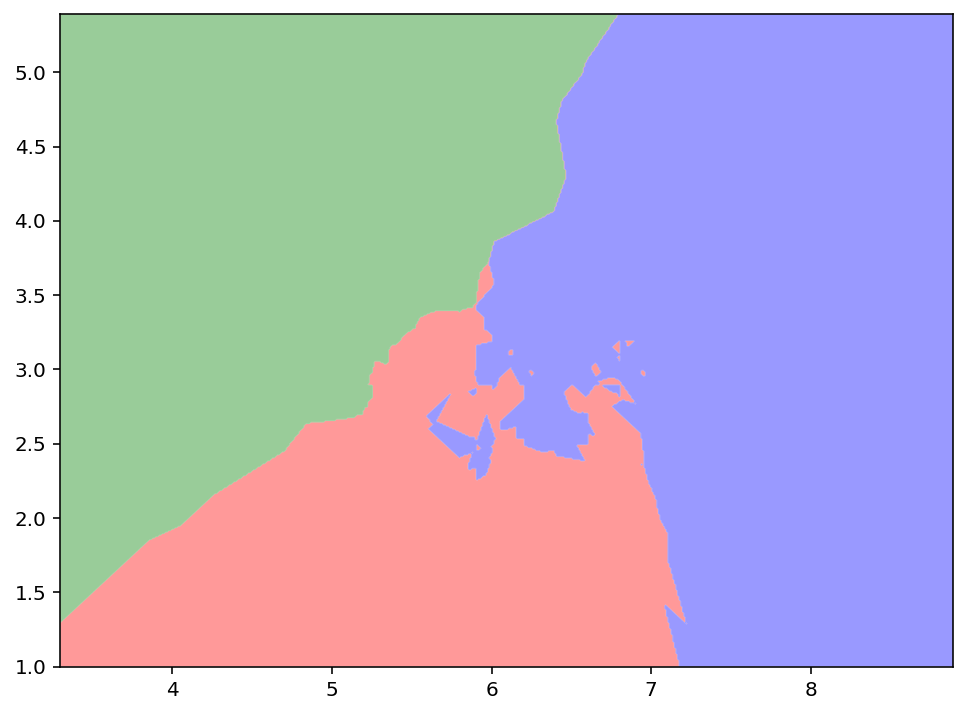

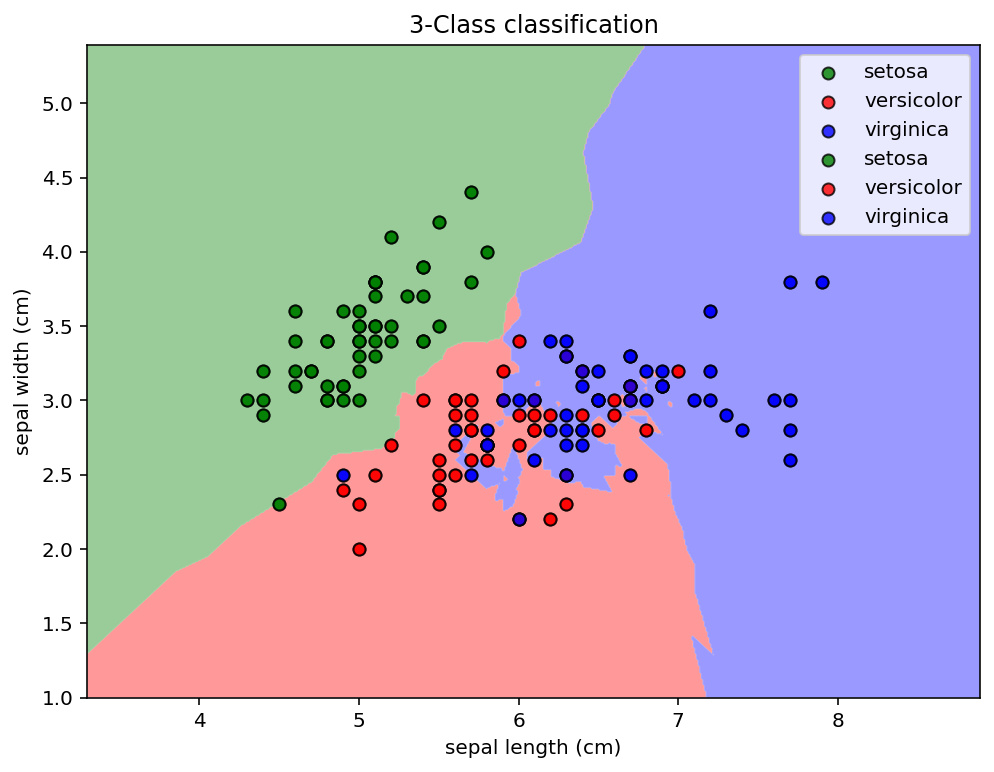

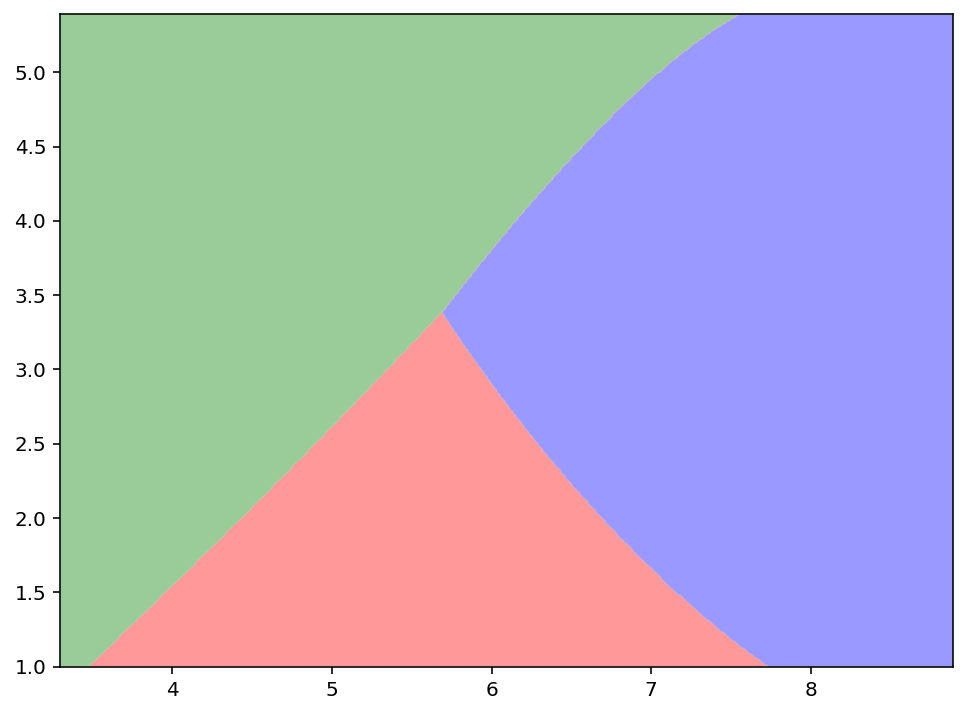

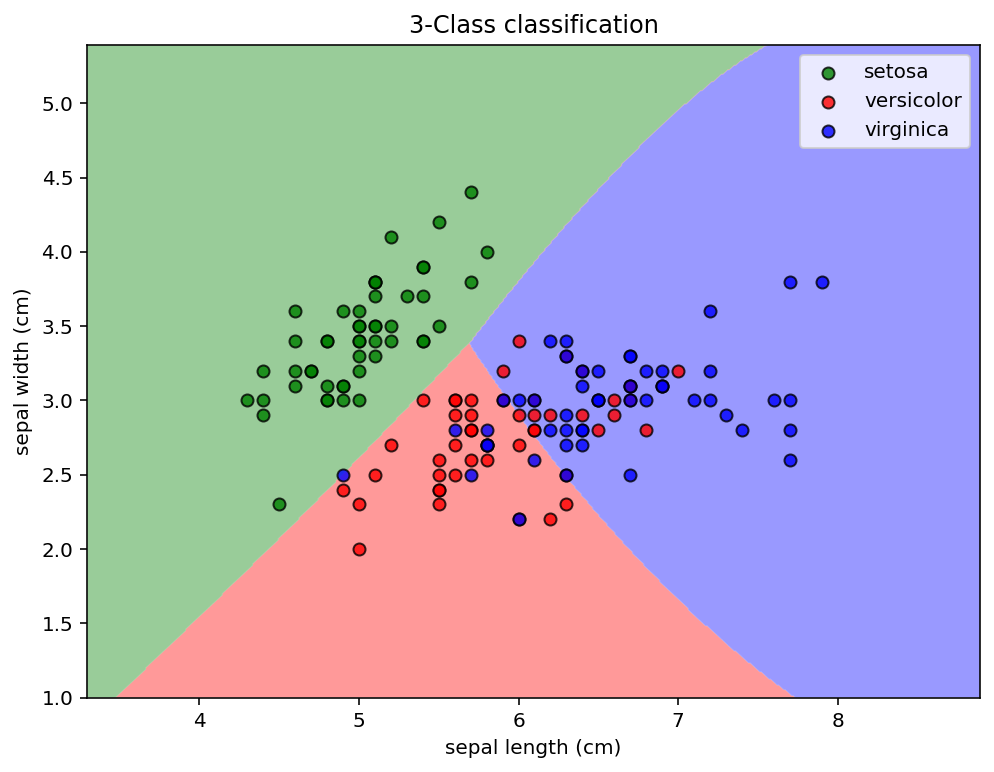

In [23]:
scores1=[]
checkAccuracy(ys_preds,ys_test,models,features,xs_2d,scores1)

In [24]:
for model,score in zip(models,scores1):
    print(f"{model} -> {score :.04f}")

LogisticRegression() -> 0.7895
DecisionTreeClassifier() -> 0.6316
RandomForestClassifier() -> 0.7368
KNeighborsClassifier() -> 0.7895
SVC() -> 0.8158


####  conclusion

on constate que la performance des modeld varie entre 63% et 81%, avec le model svc en tete a 81%, on a par contre utilisé que les deux première variable, et cela implique un perte d'information des 2 variables qui restent, c'est la raison pour laquelle on vas procéder au au traitement de données avant des les appliquer au modèle sklearn, ce qui sera réalisé à l'aide de PCA 

## Exercice 2

* Appliquez une [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) à tous les descripteurs (il y en a 4) du dataset Iris

* Donnez le pourcentage de variance expliqué par chacune des composantes sélectionnées (`explained_variance_ratio_`), ainsi que leur somme cumulée (`cumsum`)

* Appliquez l'un des classifieurs précédents aux deux premières composantes principales

* Comparez la qualité des prédictions entre celles obtenues avec les deux premières composantes principales et celles obtenues avec les 2 premiers descripteurs (Exercice 1)

Standardizing the Dataset

In [25]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)

In [26]:
dataReduced= pca_model.fit_transform(iris.data)

Applying PCA with Principal Components = 2

In [27]:
print (pca_model.explained_variance_)
print (pca_model.explained_variance_ratio_)
print (pca_model.explained_variance_ratio_.cumsum())

[4.22824171 0.24267075]
[0.92461872 0.05306648]
[0.92461872 0.97768521]


### choisir le nombre components

[ 0.92461872 0.97768521 0.99478782 1. ]        
pour ne pas perdre d'information on doit prendre un nombre n components inférieur au nombre totale tel que le cumsum de la variance est entre 95% et 100%, par conséquent, 2 est pris 

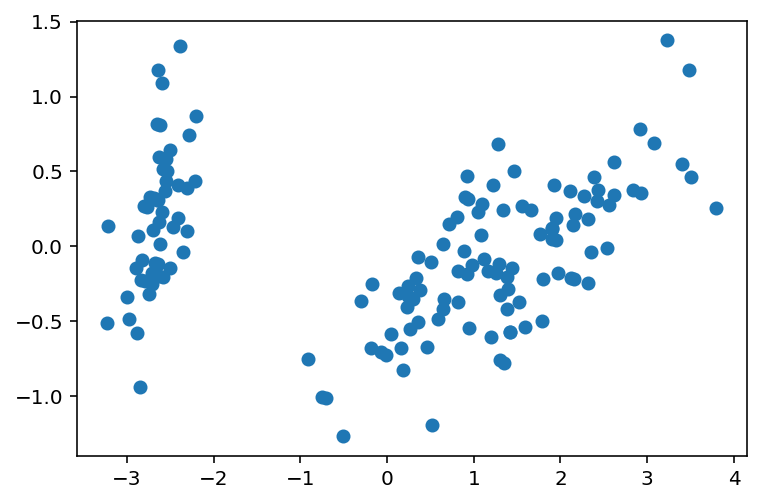

In [28]:
plt.scatter(dataReduced[:,0], dataReduced[:,1])

#### application d'un des classifieurs précédents aux deux premières composantes principales

In [29]:
xs_train2, xs_test2, ys_train2, ys_test2 = train_test_split(
    dataReduced, ys, random_state=1)

In [30]:
print(models[0])
models[0]=models[0].fit(xs_train2,ys_train2)
ys_pred2=models[0].predict(xs_test2)

LogisticRegression()


LogisticRegression() -> 0.9737


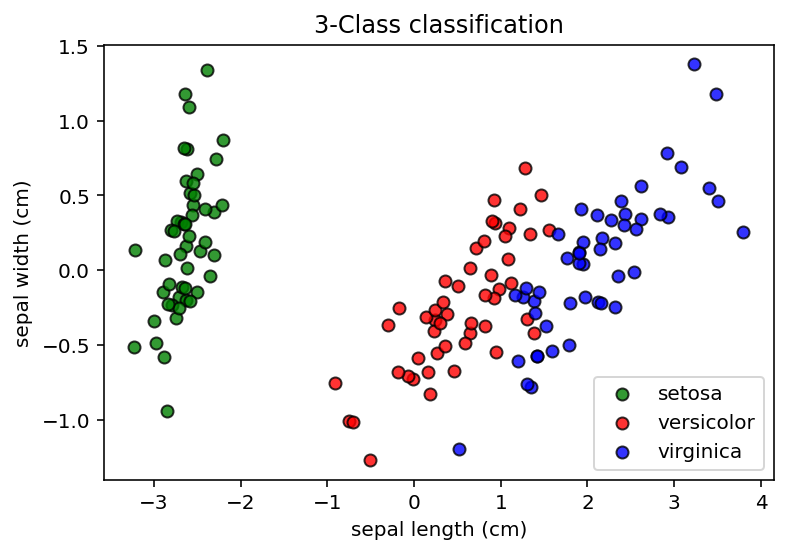

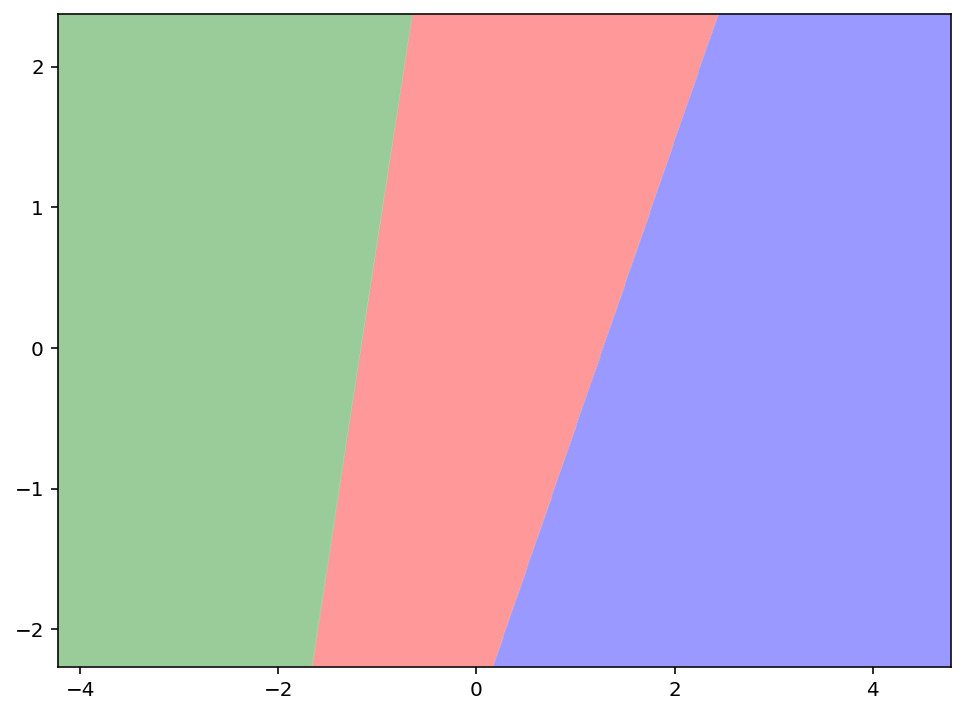

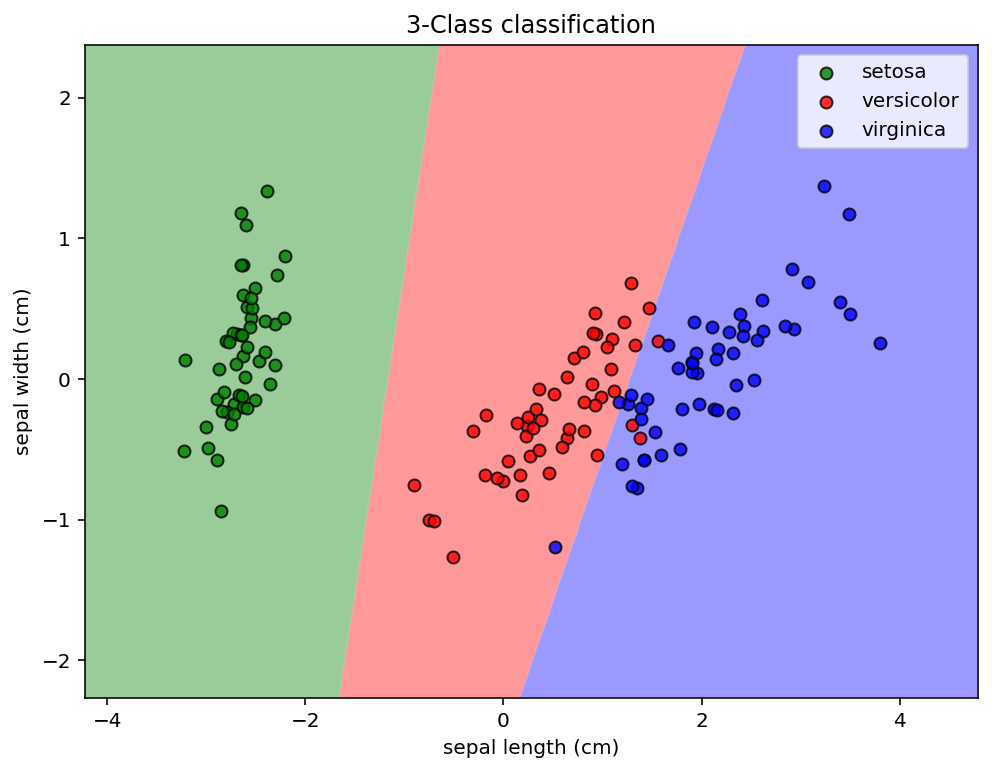

In [31]:
score = accuracy_score(ys_test2, ys_pred2)
print(f"{models[0]} -> {score :.04f}")
plot_training_points(dataReduced, ys, COLORS, features)

plot_decision_boundary(dataReduced, models[0], COLORS, HOP)

plot_decision_boundary(dataReduced, models[0], COLORS, HOP)
plot_training_points(dataReduced, ys, COLORS, features)

FOR ALL MODELS

LogisticRegression() -> 0.9737
DecisionTreeClassifier() -> 0.9737
RandomForestClassifier() -> 0.9737
KNeighborsClassifier() -> 1.0000
SVC() -> 0.9737


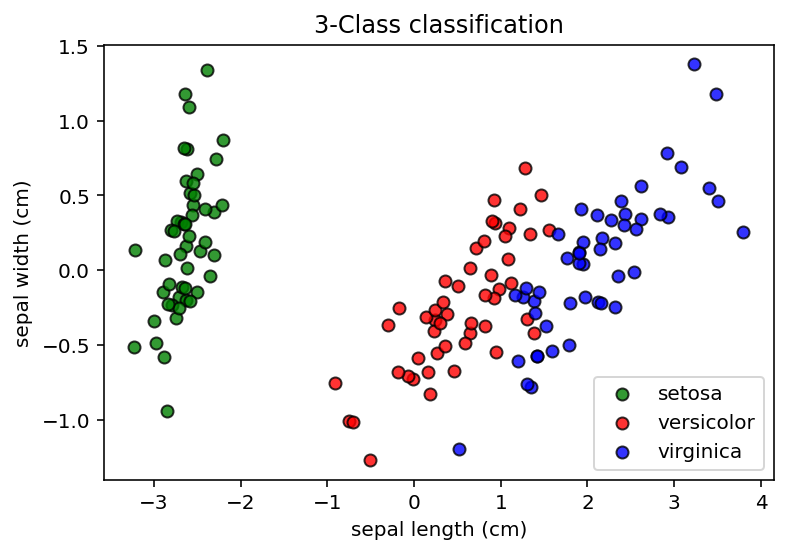

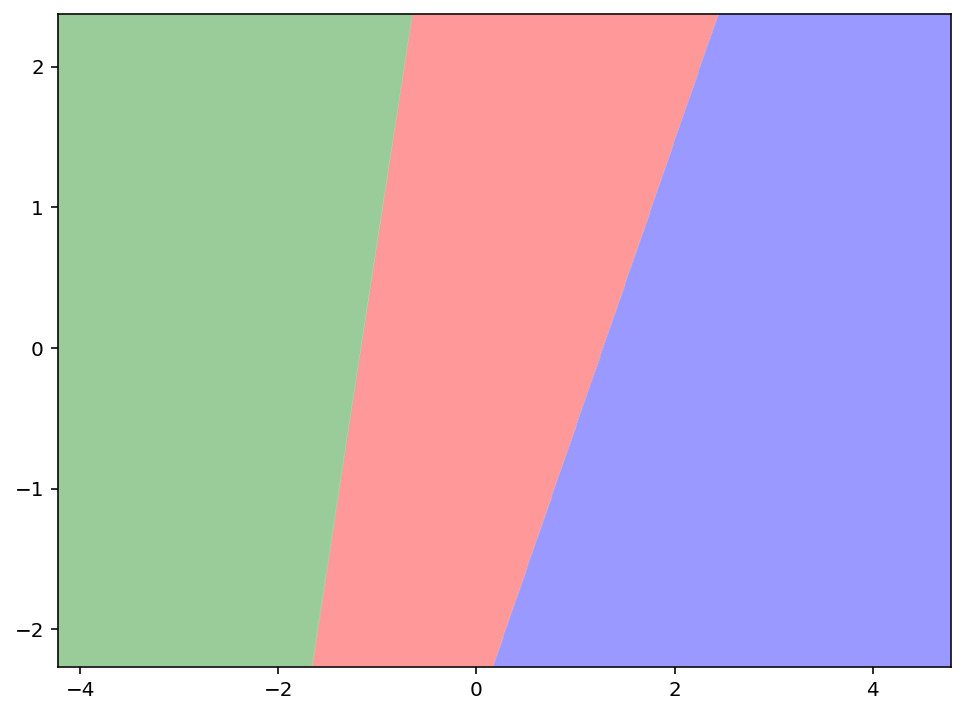

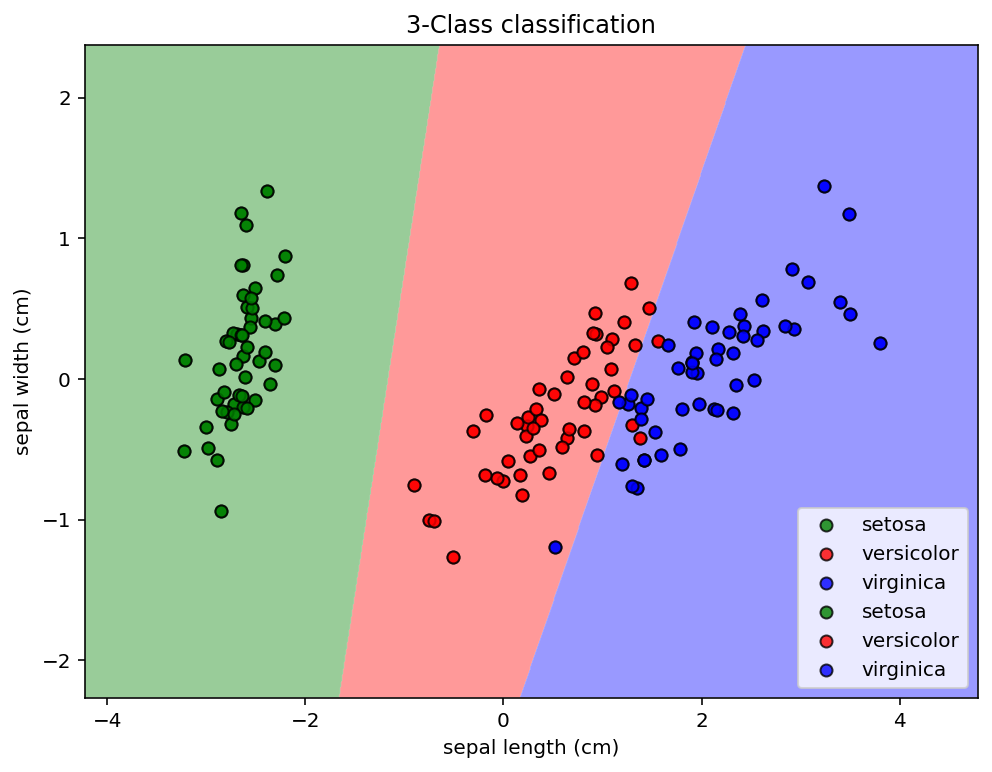

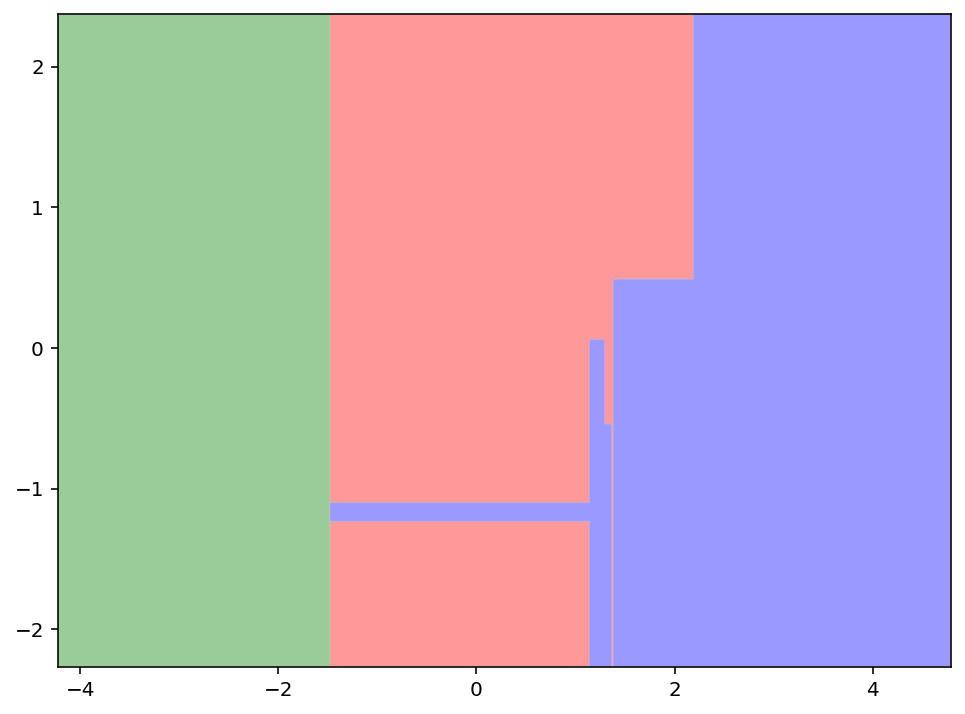

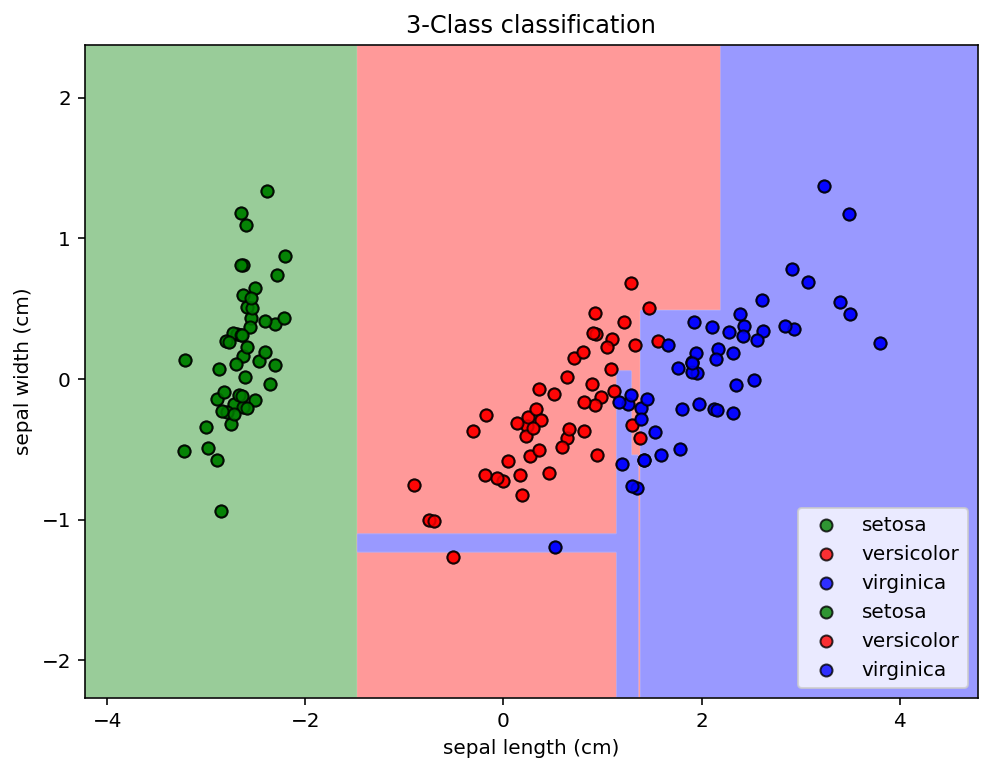

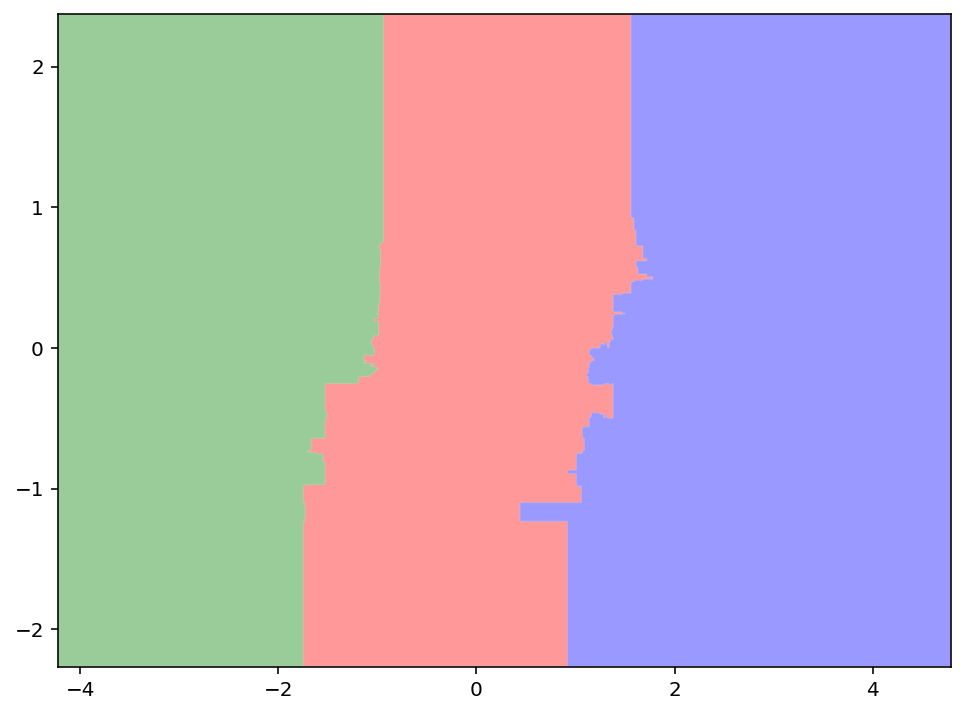

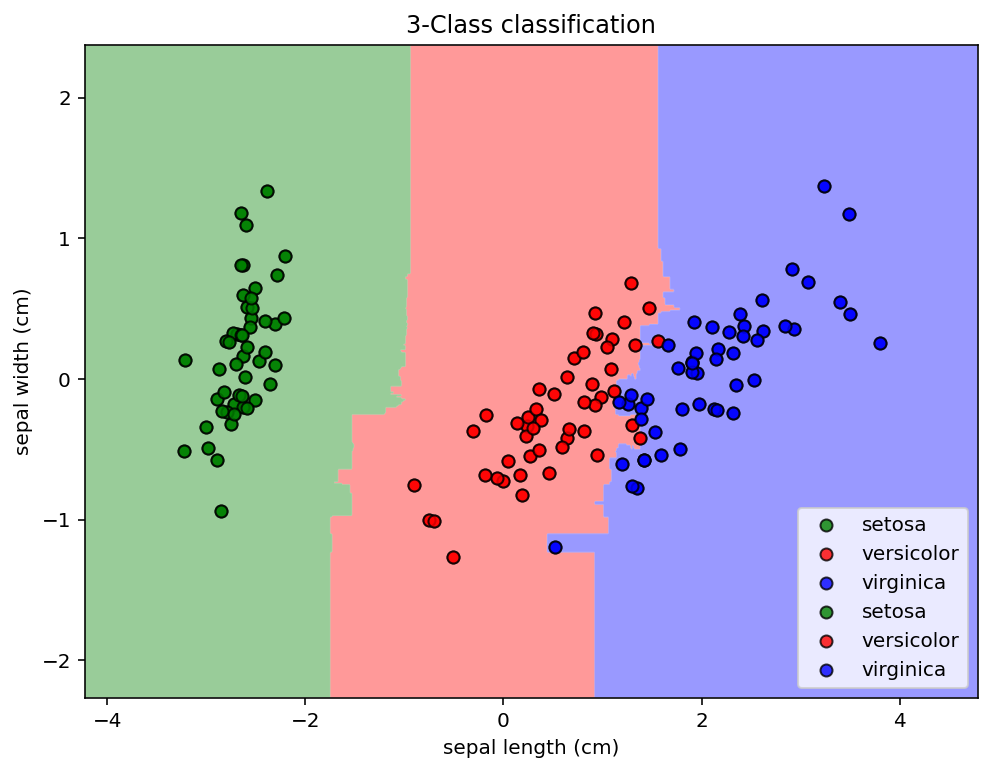

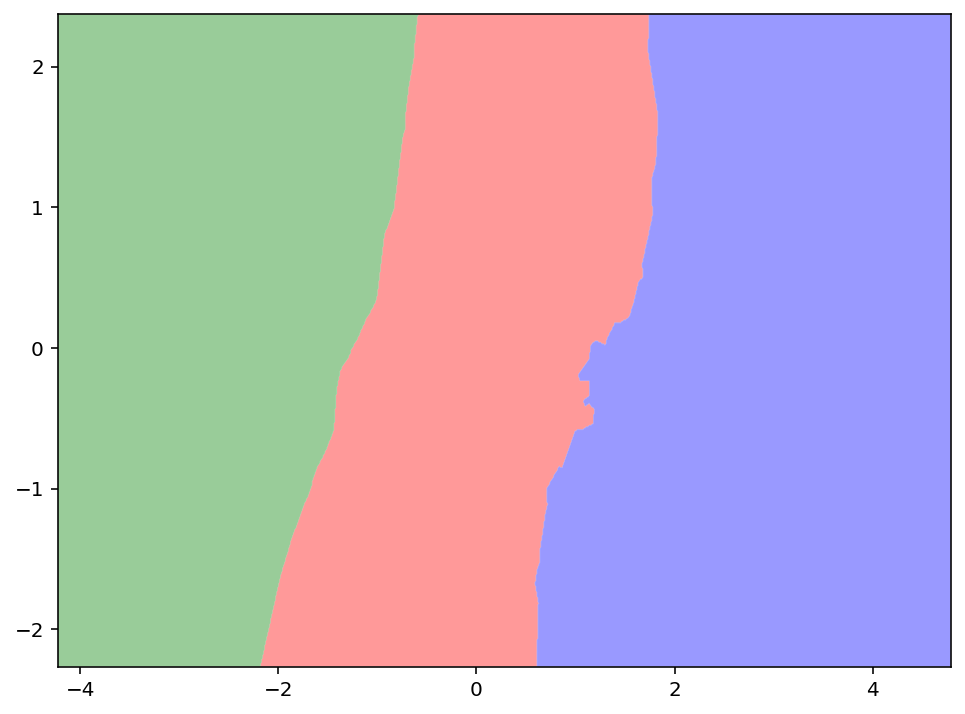

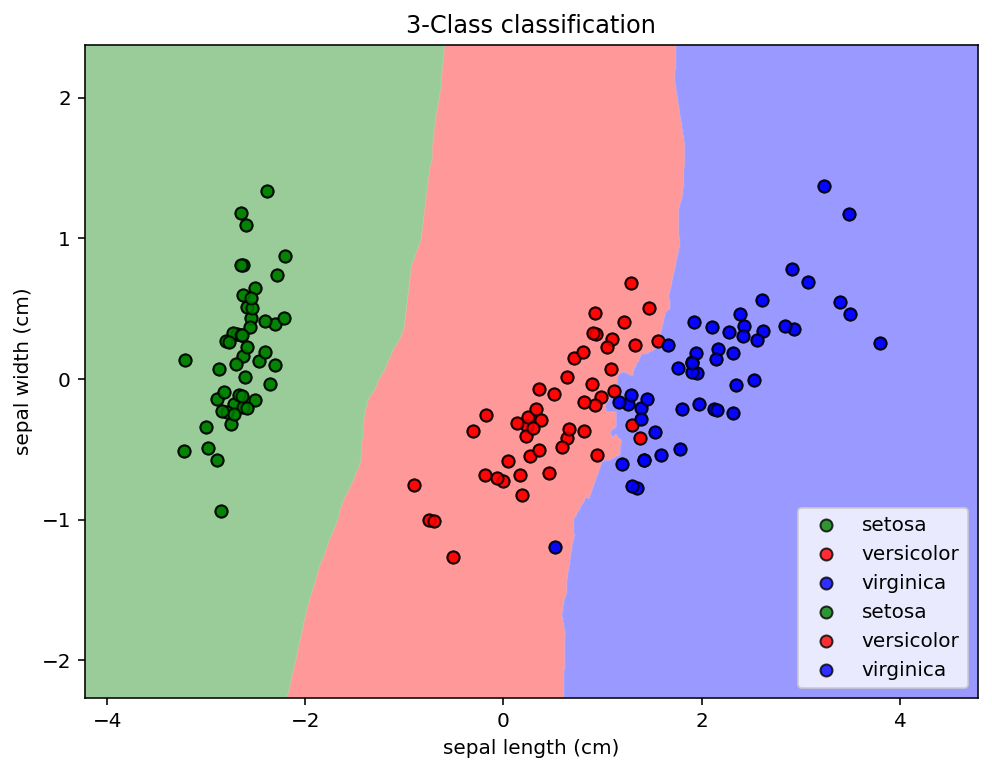

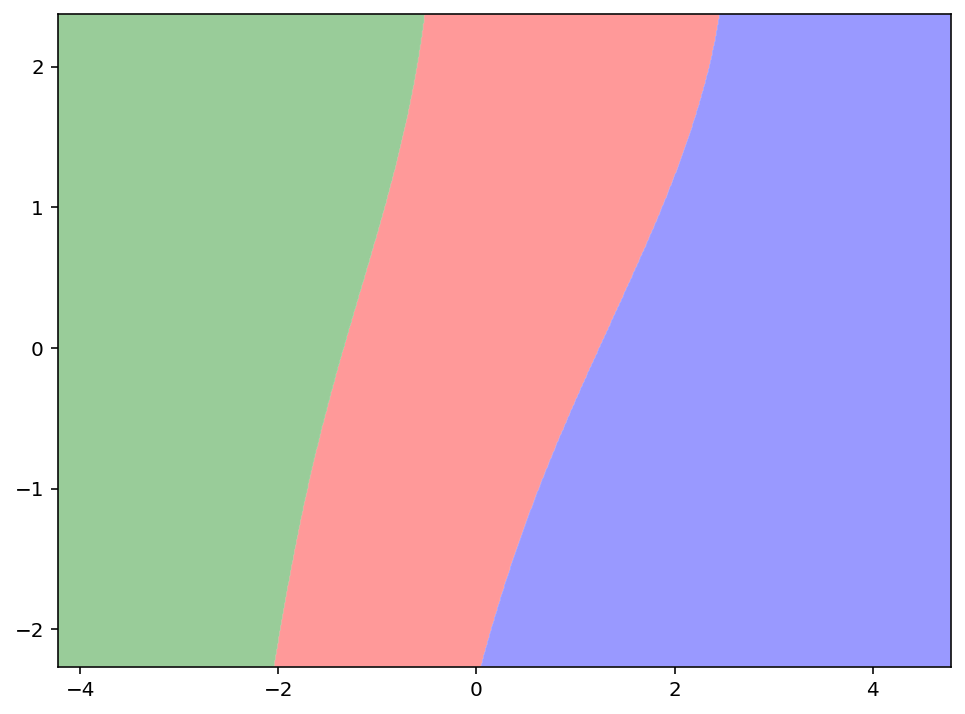

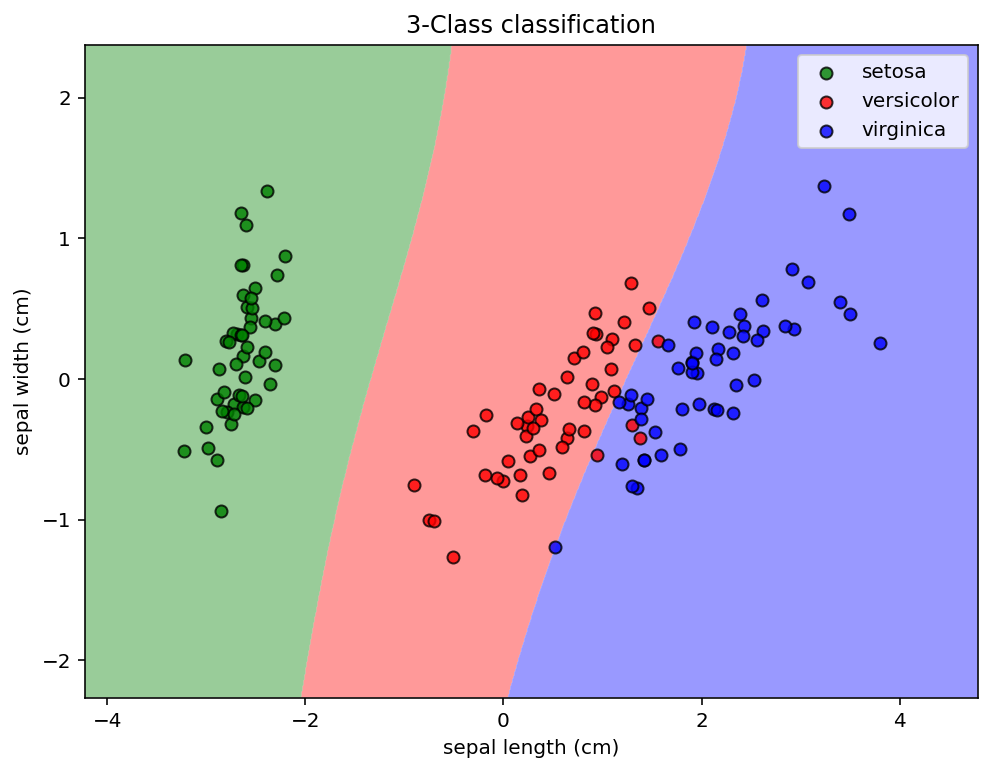

In [32]:
scores=[]
for model in models : 
    model=model.fit(xs_train2,ys_train2)
    ys_pred2=model.predict(xs_test2)

    score = accuracy_score(ys_test2, ys_pred2)
    scores.append(score)
    print(f"{model} -> {score :.04f}")
    plot_training_points(dataReduced, ys, COLORS, features)

    plot_decision_boundary(dataReduced, model, COLORS, HOP)

    plot_decision_boundary(dataReduced, model, COLORS, HOP)
    plot_training_points(dataReduced, ys, COLORS, features)

In [33]:
for model,score in zip(models,scores):
    print(f"{model} -> {score :.04f}")

LogisticRegression() -> 0.9737
DecisionTreeClassifier() -> 0.9737
RandomForestClassifier() -> 0.9737
KNeighborsClassifier() -> 1.0000
SVC() -> 0.9737


## analyse : 

we notice that the performance has increased after having the data redimensioned with a number of components that prevent data lost, this pca techniques allows us to make the prediction not only faster but also more efficient with an accuracy between 97% and 100%


---